3145


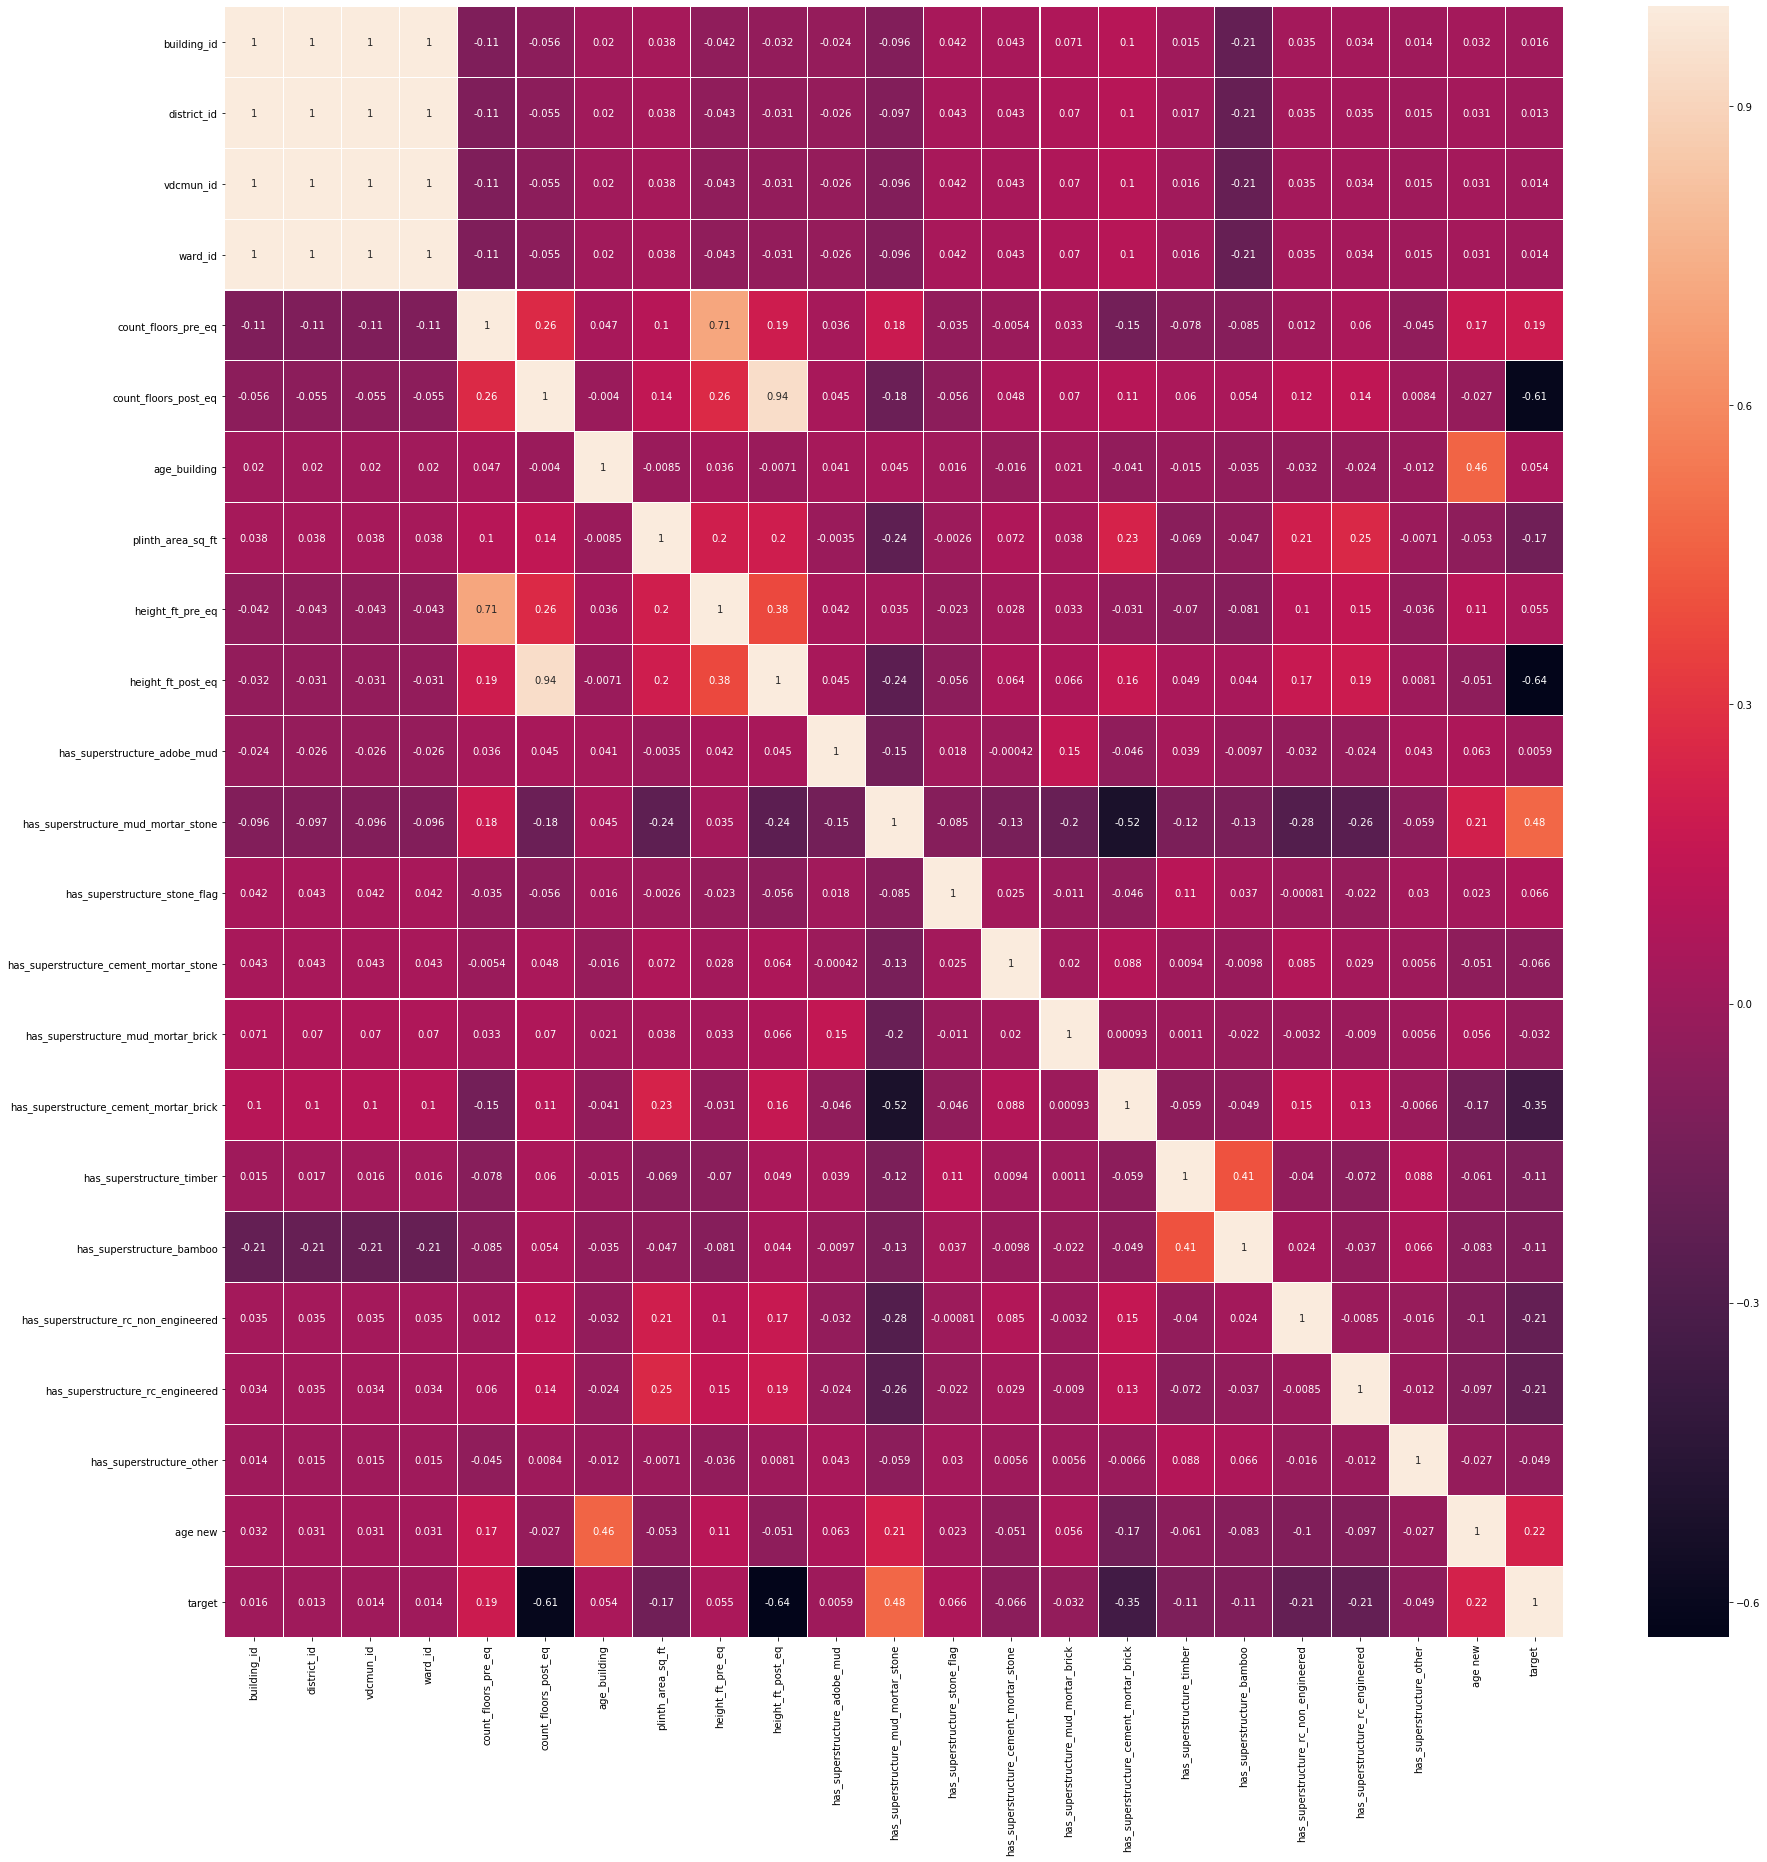

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
def score_to_numeric(x):
    if x=='Grade 1':
        return 1
    if x=='Grade 2':
        return 2
    if x=='Grade 3':
        return 3
    if x=='Grade 4':
        return 4
    if x=='Grade 5':
        return 5
def age(x):
    if x<5:
        return 1
    if x<10:
        return 2
    if x<15:
        return 3
    if x<20:
        return 4
    if x<25:
        return 5
    if x<30:
        return 6
    if x<35:
        return 7
    if x<40:
        return 8
    if x<45:
        return 9
    if x<50:
        return 10
    if x<55:
        return 11
    if x<65:
        return 12
    if x<70:
        return 13
    if x<75:
        return 14
    if x<80:
        return 15
    return 16
data=pd.read_csv("dataset/csv_building_structure.csv")

data["age new"]=data["age_building"].apply(age)
data['target'] = data['damage_grade'].apply(score_to_numeric)

corrmat = data.corr()
feature=corrmat.index
plt.figure(figsize=(30,30))
g=sns.heatmap(corrmat,linewidths=0.1,annot=True)
#print(data['age_building'].value_counts())
print(len(data[data["age_building"]==999]))


